# Importing the Required Packages

In [691]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from math import sin, cos, sqrt, atan2, radians


# Preprocessing the Dataset

In [692]:
resale_data = pd.read_csv('Data/resale_price_2017_onwards.csv')
resale_data['address'] = resale_data['block'] + ' ' + resale_data['street_name']
resale_data.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5


In [693]:
resale_location = pd.read_excel('Data/resale_locations.xlsx', engine='openpyxl')
resale_location.head()


,address,latitude,longitude,postal_code
0,406 ANG MO KIO AVE 10,1.362005,103.853880,560406
1,108 ANG MO KIO AVE 4,1.370966,103.838202,560108
2,602 ANG MO KIO AVE 5,1.380709,103.835368,560602
3,465 ANG MO KIO AVE 10,1.366201,103.857201,560465
4,601 ANG MO KIO AVE 5,1.381041,103.835132,560601


In [694]:
resale_merged_data = resale_data.merge(resale_location, how='inner', on='address')
resale_merged_data.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,latitude,longitude,postal_code
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,1.362005,103.85388,560406
1,2017-05,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 01 month,235000.0,406 ANG MO KIO AVE 10,1.362005,103.85388,560406
2,2018-03,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,202000.0,406 ANG MO KIO AVE 10,1.362005,103.85388,560406
3,2018-03,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,210000.0,406 ANG MO KIO AVE 10,1.362005,103.85388,560406
4,2018-05,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,60 years 01 month,220000.0,406 ANG MO KIO AVE 10,1.362005,103.85388,560406


In [695]:
resale_merged_data = resale_merged_data[['month', 'town', 'floor_area_sqm', 'remaining_lease', 'latitude', 'longitude', 'resale_price']]
resale_merged_data.head()


,month,town,floor_area_sqm,remaining_lease,latitude,longitude,resale_price
0,2017-01,ANG MO KIO,44.0,61 years 04 months,1.362005,103.85388,232000.0
1,2017-05,ANG MO KIO,44.0,61 years 01 month,1.362005,103.85388,235000.0
2,2018-03,ANG MO KIO,44.0,60 years 02 months,1.362005,103.85388,202000.0
3,2018-03,ANG MO KIO,44.0,60 years 02 months,1.362005,103.85388,210000.0
4,2018-05,ANG MO KIO,44.0,60 years 01 month,1.362005,103.85388,220000.0


In [696]:
resale_merged_data['remaining_lease'].apply(lambda x: x[9:11])


0         04
1         01
2         02
3         02
4         01
          ..
170200      
170201      
170202      
170203      
170204    11
Name: remaining_lease, Length: 170205, dtype: object

In [697]:
resale_merged_data['year'] = resale_merged_data['month'].apply(lambda x: x[:4]).astype('int')
resale_merged_data['month'] = resale_merged_data['month'].apply(lambda x: x[5:]).astype('int')
resale_merged_data['year'] = round(resale_merged_data['year'] + resale_merged_data['month']/12, 1)
resale_merged_data = resale_merged_data[['year', 'town', 'floor_area_sqm', 'remaining_lease', 'latitude', 'longitude', 'resale_price']]
resale_merged_data['remaining_lease'] = resale_merged_data['remaining_lease'].apply(lambda x: x[:2]).astype('int')
resale_merged_data.head()


,year,town,floor_area_sqm,remaining_lease,latitude,longitude,resale_price
0,2017.1,ANG MO KIO,44.0,61,1.362005,103.85388,232000.0
1,2017.4,ANG MO KIO,44.0,61,1.362005,103.85388,235000.0
2,2018.2,ANG MO KIO,44.0,60,1.362005,103.85388,202000.0
3,2018.2,ANG MO KIO,44.0,60,1.362005,103.85388,210000.0
4,2018.4,ANG MO KIO,44.0,60,1.362005,103.85388,220000.0


In [698]:
mrt_location = pd.read_csv('./Data/mrt_location.csv')
mrt_location.head()


,MRT,Latitude,Longitude,PLN_AREA_N
0,ADMIRALTY MRT STATION,1.440588562,103.8009905,WOODLANDS
1,ALJUNIED MRT STATION,1.316432612,103.882906,GEYLANG
2,ANG MO KIO MRT STATION,1.36993285,103.8495581,ANG MO KIO
3,BARTLEY MRT STATION,1.342501178,103.8801779,SERANGOON
4,BAYFRONT MRT STATION,1.281873789,103.8590798,CENTRAL AREA


In [699]:
mrt_location[mrt_location['Latitude']=='NotFound']


,MRT,Latitude,Longitude,PLN_AREA_N
56,HUME MRT STATION,NotFound,NotFound,NaN


In [700]:
mrt_location = mrt_location[mrt_location['MRT']!='HUME MRT STATION']


In [701]:
mrt_location['Latitude'] = mrt_location['Latitude'].astype('float')
mrt_location['Longitude'] = mrt_location['Longitude'].astype('float')


In [702]:
mrt_location.dtypes


MRT            object
Latitude      float64
Longitude     float64
PLN_AREA_N     object
dtype: object

In [703]:
mrt_location['MRT'] = mrt_location['MRT'].apply(lambda x: x.replace(' MRT STATION', ''))
mrt_location.head()


,MRT,Latitude,Longitude,PLN_AREA_N
0,ADMIRALTY,1.440589,103.800990,WOODLANDS
1,ALJUNIED,1.316433,103.882906,GEYLANG
2,ANG MO KIO,1.369933,103.849558,ANG MO KIO
3,BARTLEY,1.342501,103.880178,SERANGOON
4,BAYFRONT,1.281874,103.859080,CENTRAL AREA


In [704]:
mrt_location.shape


(137, 4)

In [705]:
pln_area_list = list(set(resale_merged_data['town'].tolist()))


In [706]:
mrt_location = mrt_location[mrt_location['PLN_AREA_N'].isin(pln_area_list)]
mrt_location.shape


(121, 4)

In [707]:
mrt_location_agg = mrt_location.groupby('PLN_AREA_N', as_index=False).agg(mrt_lat = ('Latitude', 'mean'), mrt_lon = ('Longitude', 'mean'))
mrt_location_agg.head()


,PLN_AREA_N,mrt_lat,mrt_lon
0,ANG MO KIO,1.377146,103.841715
1,BEDOK,1.329178,103.929209
2,BISHAN,1.354623,103.840821
3,BUKIT BATOK,1.363873,103.758881
4,BUKIT MERAH,1.278769,103.818554


In [708]:
resale_merged_data.head()


,year,town,floor_area_sqm,remaining_lease,latitude,longitude,resale_price
0,2017.1,ANG MO KIO,44.0,61,1.362005,103.85388,232000.0
1,2017.4,ANG MO KIO,44.0,61,1.362005,103.85388,235000.0
2,2018.2,ANG MO KIO,44.0,60,1.362005,103.85388,202000.0
3,2018.2,ANG MO KIO,44.0,60,1.362005,103.85388,210000.0
4,2018.4,ANG MO KIO,44.0,60,1.362005,103.85388,220000.0


In [709]:
resale_merged_data.columns = ['year', 'PLN_AREA_N', 'floor_area_sqm', 'remaining_lease', 'hdb_lat', 'hdb_lon', 'resale_price']
resale_merged_data.head()


,year,PLN_AREA_N,floor_area_sqm,remaining_lease,hdb_lat,hdb_lon,resale_price
0,2017.1,ANG MO KIO,44.0,61,1.362005,103.85388,232000.0
1,2017.4,ANG MO KIO,44.0,61,1.362005,103.85388,235000.0
2,2018.2,ANG MO KIO,44.0,60,1.362005,103.85388,202000.0
3,2018.2,ANG MO KIO,44.0,60,1.362005,103.85388,210000.0
4,2018.4,ANG MO KIO,44.0,60,1.362005,103.85388,220000.0


In [710]:
final_df = resale_merged_data.merge(mrt_location_agg, how='inner', on='PLN_AREA_N')
final_df.head()


,year,PLN_AREA_N,floor_area_sqm,remaining_lease,hdb_lat,hdb_lon,resale_price,mrt_lat,mrt_lon
0,2017.1,ANG MO KIO,44.0,61,1.362005,103.85388,232000.0,1.377146,103.841715
1,2017.4,ANG MO KIO,44.0,61,1.362005,103.85388,235000.0,1.377146,103.841715
2,2018.2,ANG MO KIO,44.0,60,1.362005,103.85388,202000.0,1.377146,103.841715
3,2018.2,ANG MO KIO,44.0,60,1.362005,103.85388,210000.0,1.377146,103.841715
4,2018.4,ANG MO KIO,44.0,60,1.362005,103.85388,220000.0,1.377146,103.841715


In [711]:
R = 6373.0

final_df['hdb_lat_rad'] = final_df['hdb_lat'].apply(lambda x: radians(x))
final_df['hdb_lon_rad'] = final_df['hdb_lon'].apply(lambda x: radians(x))
final_df['mrt_lat_rad'] = final_df['mrt_lat'].apply(lambda x: radians(x))
final_df['mrt_lon_rad'] = final_df['mrt_lon'].apply(lambda x: radians(x))

final_df['dlat'] = final_df['mrt_lat_rad'] - final_df['hdb_lat_rad']
final_df['dlon'] = final_df['mrt_lon_rad'] - final_df['hdb_lon_rad']

final_df['a'] = final_df['dlat'].apply(lambda x: sin(x / 2)**2) + final_df.apply(lambda row: cos(row['hdb_lat_rad']) * cos(row['mrt_lat_rad']) * sin(row['dlon'] / 2)**2, axis=1)
final_df['c'] = final_df['a'].apply(lambda x: 2 * atan2(sqrt(x), sqrt(1 - x)))

final_df['distance_to_mrt_km'] = round(R * final_df['c'], 1)


In [712]:
final_df = final_df[['year', 'PLN_AREA_N', 'floor_area_sqm', 'remaining_lease', 'distance_to_mrt_km', 'resale_price']]
final_df.head()


,year,PLN_AREA_N,floor_area_sqm,remaining_lease,distance_to_mrt_km,resale_price
0,2017.1,ANG MO KIO,44.0,61,2.2,232000.0
1,2017.4,ANG MO KIO,44.0,61,2.2,235000.0
2,2018.2,ANG MO KIO,44.0,60,2.2,202000.0
3,2018.2,ANG MO KIO,44.0,60,2.2,210000.0
4,2018.4,ANG MO KIO,44.0,60,2.2,220000.0


# Visualizing the Relationship Between Year, Floor Area, Remaining Lease and Distance to MRT vs Resale HDB Price

Text(0.5, 1.0, 'Resale HDB Price vs Resale HDB Distance to MRT (km)')

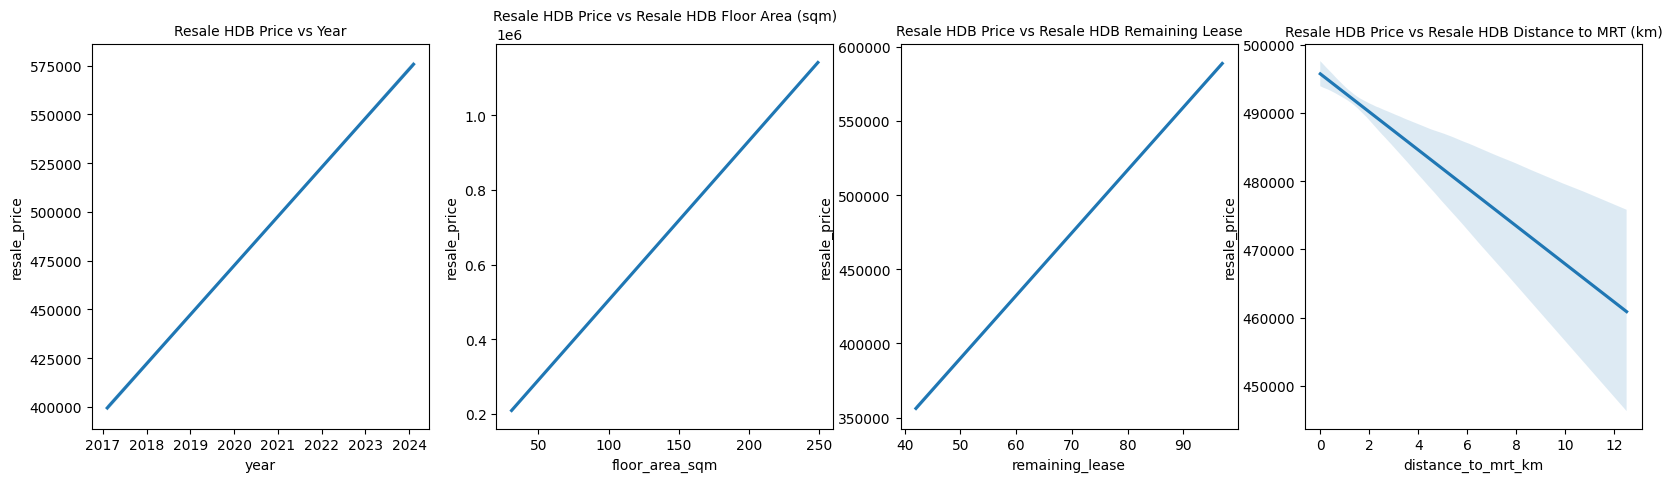

In [713]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.regplot(final_df, x='year', y='resale_price', scatter=False, ax=ax[0])
ax[0].set_title('Resale HDB Price vs Year', fontsize=10)
sns.regplot(final_df, x='floor_area_sqm', y='resale_price', scatter=False, ax=ax[1])
ax[1].set_title('Resale HDB Price vs Resale HDB Floor Area (sqm)', fontsize=10)
sns.regplot(final_df, x='remaining_lease', y='resale_price', scatter=False, ax=ax[2])
ax[2].set_title('Resale HDB Price vs Resale HDB Remaining Lease', fontsize=10)
sns.regplot(final_df, x='distance_to_mrt_km', y='resale_price', scatter=False, ax=ax[3])
ax[3].set_title('Resale HDB Price vs Resale HDB Distance to MRT (km)', fontsize=10)


# Multiple Linear Regression (For Reference Only)

In [714]:
X = sm.add_constant(final_df[['year', 'floor_area_sqm', 'remaining_lease', 'distance_to_mrt_km']])
y = final_df['resale_price']

model = sm.OLS(y, X).fit()


In [715]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                 4.605e+04
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:30:28   Log-Likelihood:            -2.1315e+06
No. Observations:              162810   AIC:                         4.263e+06
Df Residuals:                  162805   BIC:                         4.263e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.432e+07   2.95e+05   -183.928      0.000   -5.49e+07   -5.37e+07
year                2.681e+04    146.127    183.477      0.000    2.65e+04    2.71e+04
floor_area_sqm      4091.1347     12.171    336.127      0.000    4067.279    4114.990
remaining_lease     3332.9484     21.153    157.561      0.000    3291.488    3374.408
distance_to_mrt_km -1.117e+04    444.647    -25.123      0.000    -1.2e+04   -1.03e+04
==============================================================================
Omnibus:                    45630.394   Durbin-Watson:                   0.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125697.458
Skew:                           1.499   Prob(JB):                         0.00
Kurtosis:                       6.089   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Hedonic Regression

In [716]:
final_df_log = final_df
final_df_log['year_log'] = final_df_log['year'].apply(lambda x: np.log(x))
final_df_log['floor_area_sqm_log'] = final_df_log['floor_area_sqm'].apply(lambda x: np.log(x))
final_df_log['remaining_lease_log'] = final_df_log['remaining_lease'].apply(lambda x: np.log(x))
final_df_log['distance_to_mrt_km_log'] = final_df_log['distance_to_mrt_km'].apply(lambda x: np.log(x))
final_df_log['resale_price_log'] = final_df_log['resale_price'].apply(lambda x: np.log(x))
final_df_log.head()


,year,PLN_AREA_N,floor_area_sqm,remaining_lease,distance_to_mrt_km,resale_price,year_log,floor_area_sqm_log,remaining_lease_log,distance_to_mrt_km_log,resale_price_log
0,2017.1,ANG MO KIO,44.0,61,2.2,232000.0,7.609416,3.78419,4.110874,0.788457,12.354493
1,2017.4,ANG MO KIO,44.0,61,2.2,235000.0,7.609565,3.78419,4.110874,0.788457,12.367341
2,2018.2,ANG MO KIO,44.0,60,2.2,202000.0,7.609961,3.78419,4.094345,0.788457,12.216023
3,2018.2,ANG MO KIO,44.0,60,2.2,210000.0,7.609961,3.78419,4.094345,0.788457,12.254863
4,2018.4,ANG MO KIO,44.0,60,2.2,220000.0,7.610060,3.78419,4.094345,0.788457,12.301383


In [717]:
final_df_log_1 = final_df_log[['year_log', 'floor_area_sqm_log', 'remaining_lease_log', 'distance_to_mrt_km_log', 'resale_price']]
final_df_log_1.head()


,year_log,floor_area_sqm_log,remaining_lease_log,distance_to_mrt_km_log,resale_price
0,7.609416,3.78419,4.110874,0.788457,232000.0
1,7.609565,3.78419,4.110874,0.788457,235000.0
2,7.609961,3.78419,4.094345,0.788457,202000.0
3,7.609961,3.78419,4.094345,0.788457,210000.0
4,7.610060,3.78419,4.094345,0.788457,220000.0


In [718]:
X_hedonic = sm.add_constant(final_df_log[['year_log', 'floor_area_sqm_log', 'remaining_lease_log', 'distance_to_mrt_km']])
y_hedonic = final_df_log['resale_price']

model_hedonic = sm.OLS(y_hedonic, X_hedonic).fit()


In [719]:
model_hedonic.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                 4.280e+04
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:30:29   Log-Likelihood:            -2.1346e+06
No. Observations:              162810   AIC:                         4.269e+06
Df Residuals:                  162805   BIC:                         4.269e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.176e+08   2.29e+06   -182.266      0.000   -4.22e+08   -4.13e+08
year_log             5.459e+07   3.01e+05    181.372      0.000     5.4e+07    5.52e+07
floor_area_sqm_log   3.711e+05   1177.274    315.231      0.000    3.69e+05    3.73e+05
remaining_lease_log  2.124e+05   1581.338    134.310      0.000    2.09e+05    2.15e+05
distance_to_mrt_km  -1.098e+04    453.239    -24.220      0.000   -1.19e+04   -1.01e+04
==============================================================================
Omnibus:                    43283.347   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112098.127
Skew:                           1.448   Prob(JB):                         0.00
Kurtosis:                       5.852   Cond. No.                     7.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""